In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
df = pd.read_csv("StudentsPerformance.csv", encoding= "unicode_escape")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Data Cleaning and add new features

In [7]:
#creating a copy of original dataset
df_clean=df.copy() 
df_clean.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
#renaming the columns

df_clean.rename(columns = {"race/ethnicity": "race", 
                           "parental level of education":"parent_education", 
                           "test preparation course": "test_preparation_course",
                            "math score":"maths_score",
                            "reading score":"reading_score",
                            "writing score":"writing_score"},inplace=True)
df_clean.head()

,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
#total score of each student

df_clean['Total_score']= df_clean['maths_score']+df_clean['writing_score']+df_clean['reading_score']
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race                     1000 non-null   object
 2   parent_education         1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   maths_score              1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
 8   Total_score              1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [10]:
#percentage of each student

df_clean['percentage']=df_clean['Total_score']/3
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   object 
 1   race                     1000 non-null   object 
 2   parent_education         1000 non-null   object 
 3   lunch                    1000 non-null   object 
 4   test_preparation_course  1000 non-null   object 
 5   maths_score              1000 non-null   int64  
 6   reading_score            1000 non-null   int64  
 7   writing_score            1000 non-null   int64  
 8   Total_score              1000 non-null   int64  
 9   percentage               1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [11]:
#pass/fail result of each student

def result(percentage):
    if percentage >=40:
        return "PASS"
    else:
        return "FAIL"
    
df_clean['result']=df_clean['percentage'].apply(result)
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   object 
 1   race                     1000 non-null   object 
 2   parent_education         1000 non-null   object 
 3   lunch                    1000 non-null   object 
 4   test_preparation_course  1000 non-null   object 
 5   maths_score              1000 non-null   int64  
 6   reading_score            1000 non-null   int64  
 7   writing_score            1000 non-null   int64  
 8   Total_score              1000 non-null   int64  
 9   percentage               1000 non-null   float64
 10  result                   1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB
None


In [12]:
df_clean.head()

,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score,Total_score,percentage,result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,PASS
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,PASS
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,PASS
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,PASS
4,male,group C,some college,standard,none,76,78,75,229,76.333333,PASS


Data Visualization

Average in maths_score is 66.089


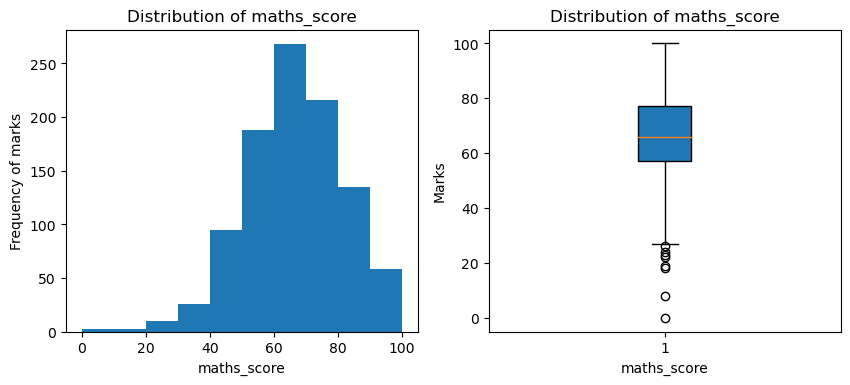

Average in reading_score is 69.169


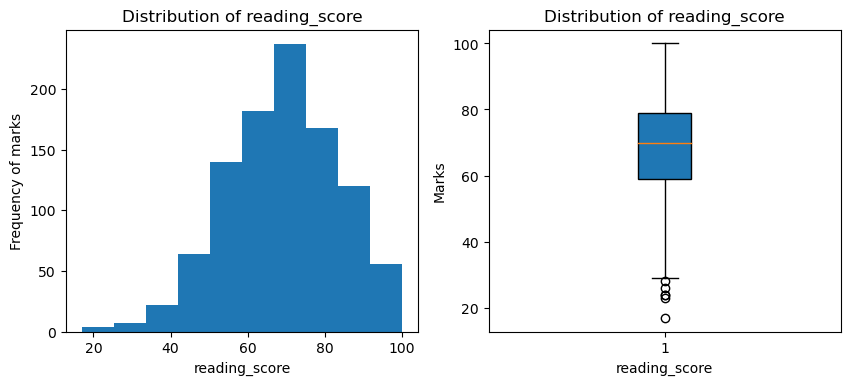

Average in writing_score is 68.054


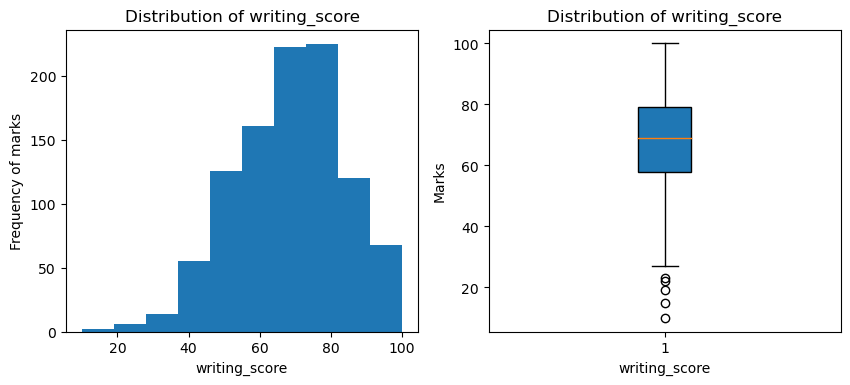

In [13]:
#Average marks in all three subjects which are maths,reading and writing

def hist_box(subject): #function to plot histogram and boxplot of given feature
    avg= str(df_clean[subject].mean())
    print("Average in {sub} is".format(sub=subject)+" "+avg)
    plt.figure(figsize=(10,4), dpi=100) 
  
    
    plt.subplot(1, 2, 1);
    plt.hist(df_clean[subject]);
    plt.xlabel("{sub}".format(sub=subject));
    plt.ylabel("Frequency of marks");
    plt.title("Distribution of {sub}".format(sub=subject));


    plt.subplot(1, 2, 2);
    plt.boxplot(df_clean[subject],patch_artist=True);
    plt.xlabel("{sub}".format(sub=subject));
    plt.ylabel("Marks");
    plt.title("Distribution of {sub}".format(sub=subject));
    plt.show();
    
hist_box("maths_score") # histogram and box-plot of maths marks
hist_box("reading_score") # histogram and box-plot of reading marks
hist_box("writing_score") # histogram and box-plot of writing marks

Anaylsis of other categorical variables

parent_education
master's degree        59
bachelor's degree     118
some high school      179
high school           196
associate's degree    222
some college          226
dtype: int64


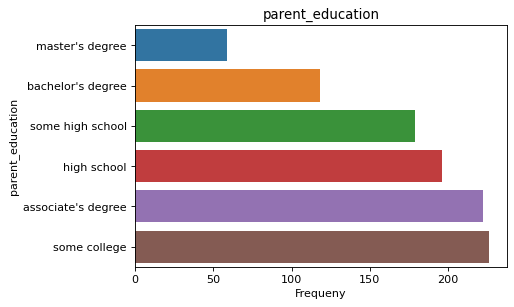

race
group A     89
group E    140
group B    190
group D    262
group C    319
dtype: int64


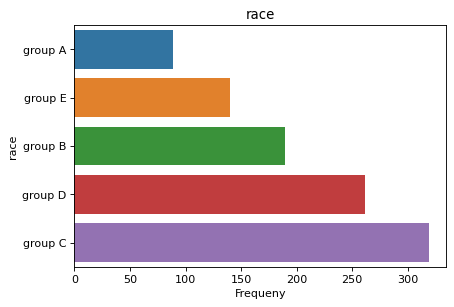

test_preparation_course
completed    358
none         642
dtype: int64


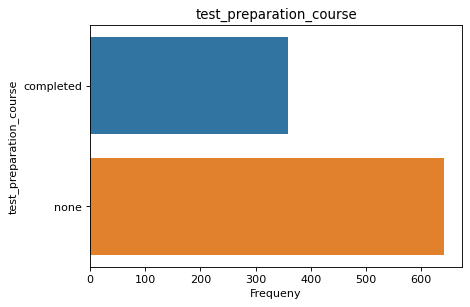

In [14]:
# function to plot bar plot for passed categrical variable.
def categorical_plot(variable):
    plt.figure(figsize=(6,4), dpi=80)
    count1=df_clean.groupby(variable).size().sort_values()
    print(count1)
    sns.barplot(y=count1.index, x=count1,data=df_clean)
    plt.xlabel("Frequeny")
    plt.ylabel("{vari}".format(vari=variable))
    plt.title(variable)
    plt.show()

# Anaylsis of parent level of education
categorical_plot("parent_education")

# anaylsis of race/ethnicity of the students
categorical_plot('race')

# anaylsis of how many students practiced test_preparation course and the students who didn't.
categorical_plot('test_preparation_course')

Anaylsis of Results of Students

Percentage of students who have passed 97.0
Percentage of students who have failed 3.0


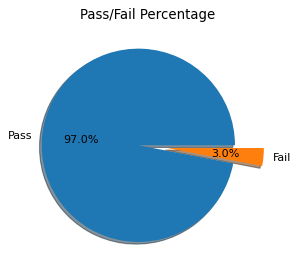

In [15]:
# anaylsing how many students have passed and failed
plt.figure(figsize=(8,4), dpi=80)
labels=['Pass','Fail']
pass_student=(df_clean[df_clean['result']=='PASS']['result'].count())*100/df_clean.shape[0]
fail_student=(df_clean[df_clean['result']=='FAIL']['result'].count())*100/df_clean.shape[0]
print("Percentage of students who have passed "+str(pass_student))
print("Percentage of students who have failed "+str(fail_student))
ex=(0.1,0.2)
result1=[pass_student,fail_student]
plt.pie(result1,labels=labels,autopct='%1.1f%%',shadow=True,explode=ex);
plt.title("Pass/Fail Percentage");

Anaylsis of marks scored by each gender in each subject

Maths Score Average based on Gender
gender
female    63.633205
male      68.728216
Name: maths_score, dtype: float64

Reading Score Average based on Gender
gender
female    72.608108
male      65.473029
Name: reading_score, dtype: float64

Writing Score Average based on Gender
gender
female    72.467181
male      63.311203
Name: writing_score, dtype: float64



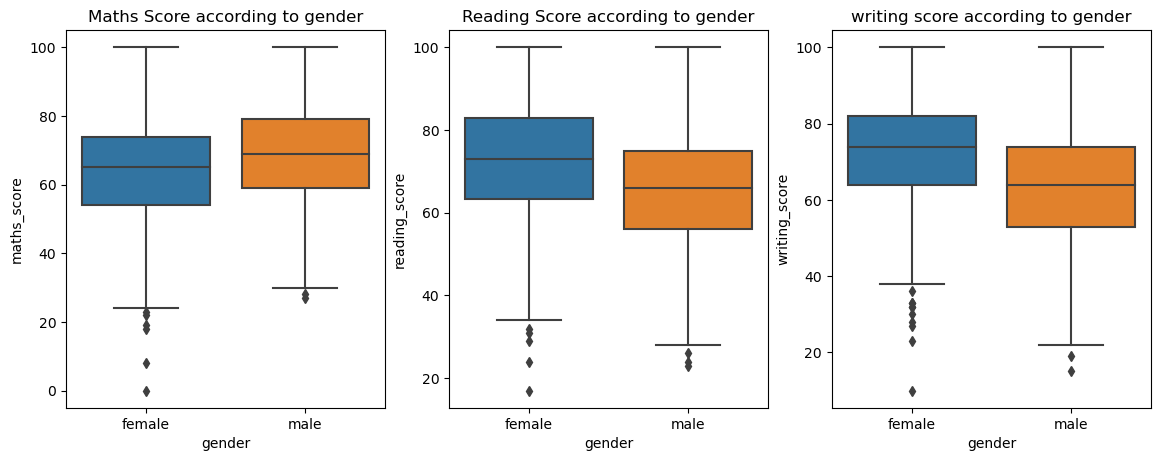

In [30]:
plt.figure(figsize=(14,5), dpi=100)
    
    
    #plot for maths score
plt.subplot(1, 3, 1);
count=df_clean.groupby('gender')['maths_score'].mean()
print("Maths Score Average based on Gender")
print(count)
print()
sns.boxplot(x='gender', y='maths_score',data=df_clean)
plt.title("Maths Score according to gender");

    #plot for reading score
plt.subplot(1, 3, 2);
sns.boxplot(x='gender', y='reading_score',data=df_clean)
count=df_clean.groupby('gender')['reading_score'].mean()
print("Reading Score Average based on Gender")
print(count)
print()
plt.title("Reading Score according to gender");
    
    #plot for writing score
plt.subplot(1, 3, 3);
sns.boxplot(x='gender', y='writing_score',data=df_clean)
count=df_clean.groupby('gender')['writing_score'].mean()
print("Writing Score Average based on Gender")
print(count)
print()
plt.title("writing score according to gender");
    
plt.show();

Corrleation between Scores in different Subjects

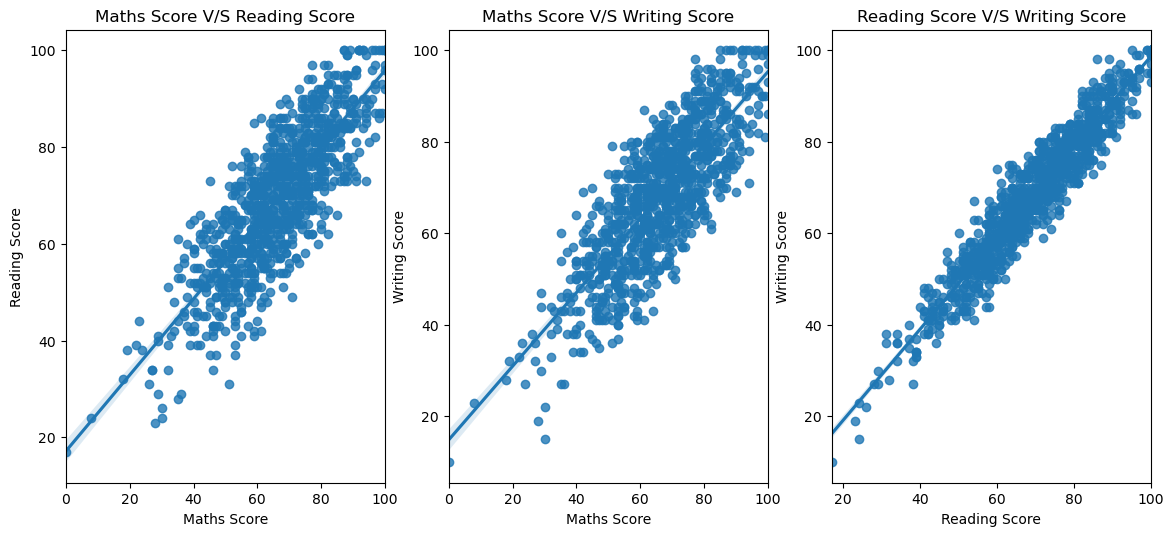

In [31]:
plt.figure(figsize=(14,6), dpi=100)

plt.subplot(1, 3, 1);
sns.regplot(x='maths_score', y='reading_score',data=df_clean)
plt.xlabel("Maths Score");
plt.ylabel("Reading Score")
plt.title("Maths Score V/S Reading Score");


plt.subplot(1, 3, 2);
sns.regplot(x='maths_score', y='writing_score',data=df_clean)
plt.xlabel("Maths Score")
plt.ylabel("Writing Score")
plt.title("Maths Score V/S Writing Score");
    
plt.subplot(1, 3, 3);
sns.regplot(x='reading_score', y='writing_score',data=df_clean)
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.title("Reading Score V/S Writing Score");
plt.show();


Distribution of Scores Based on Race/Ethincity

Maths Score Average based on Race/Ethnicity
race
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: maths_score, dtype: float64

Reading Score Average based on Race/Ethncity
race
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading_score, dtype: float64

Writing Score Average based on Race/Ethnicity
race
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing_score, dtype: float64



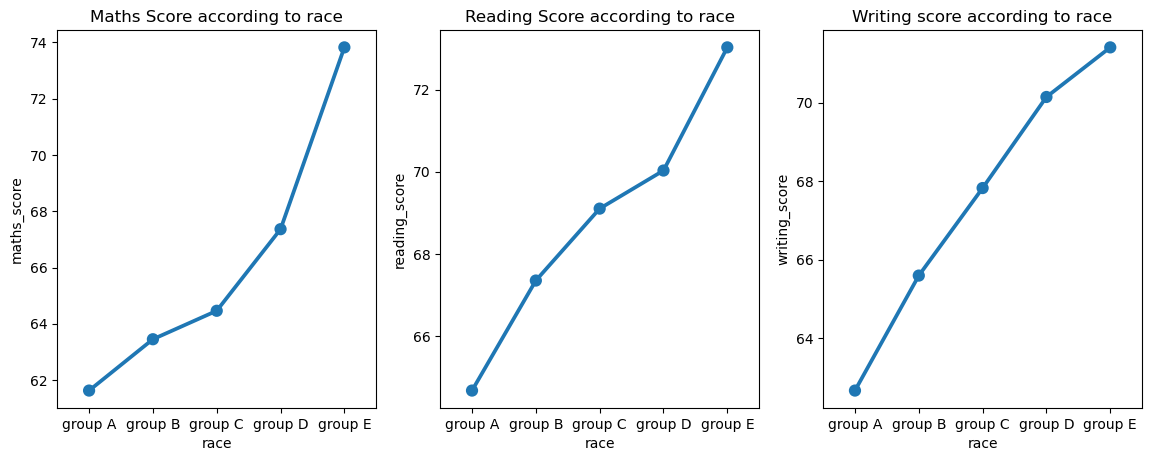

In [33]:
plt.figure(figsize=(14,5), dpi=100)
color=sns.color_palette()[0]
    
    #plot for maths score
plt.subplot(1, 3, 1);
count=df_clean.groupby('race')['maths_score'].mean().sort_values()
print("Maths Score Average based on Race/Ethnicity")
print(count)
print()
sns.pointplot(x=count.index, y=count,data=df_clean,color=color)
plt.title("Maths Score according to race");

    # plot for reading score
plt.subplot(1, 3, 2);
count=df_clean.groupby('race')['reading_score'].mean().sort_values()
print("Reading Score Average based on Race/Ethncity")
print(count)
print()
sns.pointplot(x=count.index, y=count,data=df_clean,color=color)
plt.title("Reading Score according to race");
    
    #plot for writing score
plt.subplot(1, 3, 3);
count=df_clean.groupby('race')['writing_score'].mean().sort_values()
print("Writing Score Average based on Race/Ethnicity")
print(count)
print()
sns.pointplot(x=count.index, y=count,data=df_clean,color=color)
plt.title("Writing score according to race");
    
plt.show();

Distribution of scores in all subjects based on test-prepration course

Maths Score V/s test_preparation_course
test_preparation_course
none         64.077882
completed    69.695531
Name: maths_score, dtype: float64

Reading Score Average V/s test_preparation_course
test_preparation_course
none         66.534268
completed    73.893855
Name: reading_score, dtype: float64

Writing Score V/s test_preparation_course
test_preparation_course
none         64.504673
completed    74.418994
Name: writing_score, dtype: float64



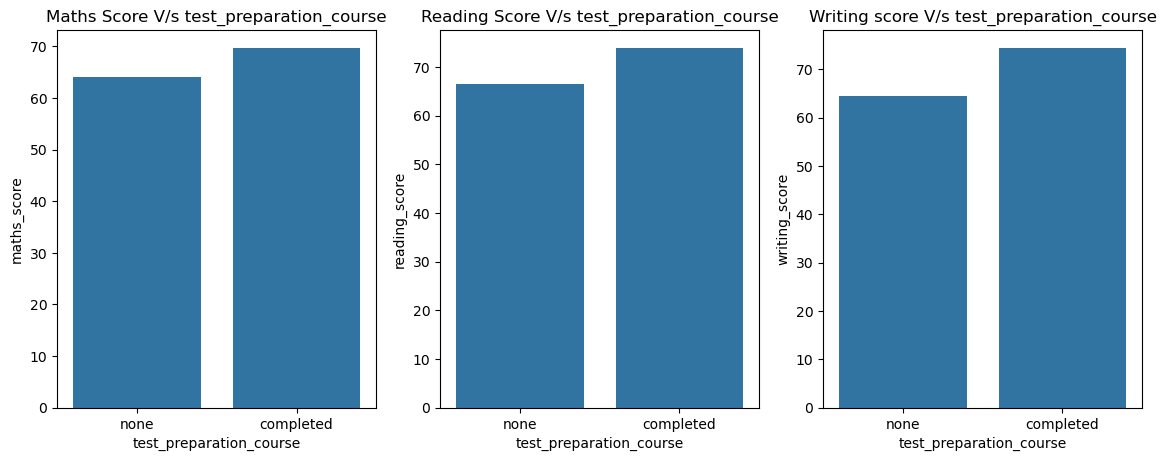

In [34]:
plt.figure(figsize=(14,5), dpi=100)
color=sns.color_palette()[0]
    
    #plot for maths score
plt.subplot(1, 3, 1);
count=df_clean.groupby('test_preparation_course')['maths_score'].mean().sort_values()
print("Maths Score V/s test_preparation_course")
print(count)
print()
sns.barplot(x=count.index,y=count,data=df_clean,color=color)
plt.title("Maths Score V/s test_preparation_course");

    #plot for reading score
plt.subplot(1, 3, 2);
count=df_clean.groupby('test_preparation_course')['reading_score'].mean().sort_values()
print("Reading Score Average V/s test_preparation_course")
print(count)
print()
sns.barplot(x=count.index, y=count,data=df_clean,color=color)
plt.title("Reading Score V/s test_preparation_course");

    # plot for writing score
plt.subplot(1, 3, 3);
count=df_clean.groupby('test_preparation_course')['writing_score'].mean().sort_values()
print("Writing Score V/s test_preparation_course")
print(count)
print()
sns.barplot(x=count.index, y=count,data=df_clean,color=color)
plt.title("Writing score V/s test_preparation_course");
    
plt.show();


Average scores in each subject based on gender and race

Maths Score by gender and race
   gender     race  maths_score
0  female  group A    58.527778
1  female  group B    61.403846
2  female  group C    62.033333
5    male  group A    63.735849
3  female  group D    65.248062
6    male  group B    65.930233
7    male  group C    67.611511
8    male  group D    69.413534
4  female  group E    70.811594
9    male  group E    76.746479

Reading Score Average by gender and race
   gender     race  reading_score
5    male  group A      61.735849
6    male  group B      62.848837
7    male  group C      65.424460
8    male  group D      66.135338
0  female  group A      69.000000
9    male  group E      70.295775
1  female  group B      71.076923
2  female  group C      71.944444
3  female  group D      74.046512
4  female  group E      75.840580

Writing Score by gender and race
   gender     race  writing_score
5    male  group A      59.150943
6    male  group B      60.220930
7    male  group C      62.712230
8    male  group D      65.4135

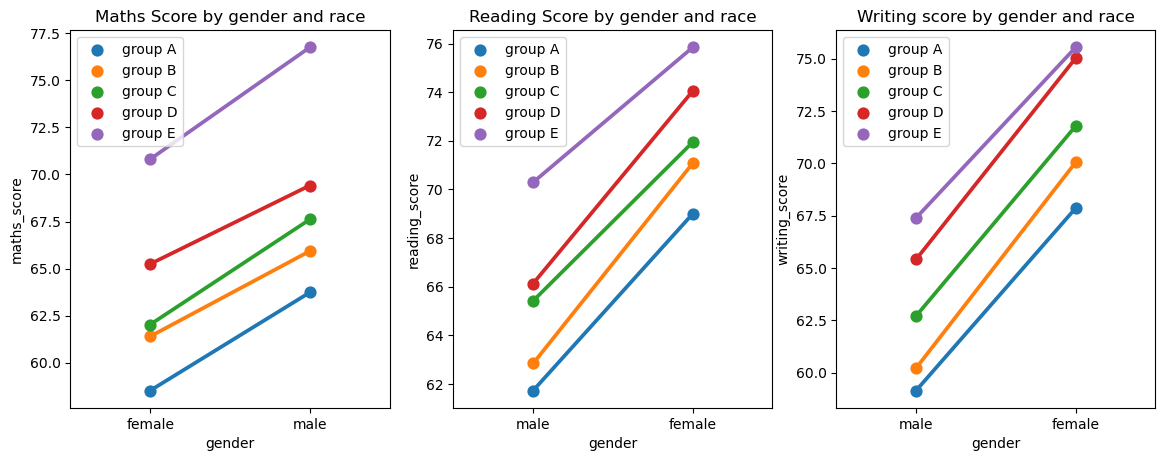

In [36]:
plt.figure(figsize=(14,5), dpi=100)
color=sns.color_palette()[0]
    
    #plot for maths score
plt.subplot(1, 3, 1);
count=df_clean.groupby(['gender','race'],as_index=False)['maths_score'].mean().sort_values(by='maths_score')
print("Maths Score by gender and race")
print(count)
print()
sns.pointplot(x='gender',y='maths_score',hue='race',data=count)
plt.title("Maths Score by gender and race");
plt.legend(loc=2)


    # plot for reading score
plt.subplot(1, 3, 2);
count=df_clean.groupby(['gender','race'],as_index=False)['reading_score'].mean().sort_values(by='reading_score')
print("Reading Score Average by gender and race")
print(count)
print()
sns.pointplot(x='gender', y='reading_score',hue='race',data=count)
plt.title("Reading Score by gender and race");
plt.legend(loc=2)
    
    #plot for writing score
plt.subplot(1, 3, 3);
count=df_clean.groupby(['gender','race'],as_index=False)['writing_score'].mean().sort_values(by='writing_score')
print("Writing Score by gender and race")
print(count)
print()
sns.pointplot(x='gender', y='writing_score',hue='race',data=count)
plt.title("Writing score by gender and race");
plt.legend(loc=2)
    
plt.show();

Average Scores by test preparation course and Pass/Fail Result

Maths Score by test course and result
  test_preparation_course result  maths_score
0               completed   FAIL    30.333333
2                    none   FAIL    30.740741
3                    none   PASS    65.541463
1               completed   PASS    70.028169

Reading Score Average by test course and result
  test_preparation_course result  reading_score
2                    none   FAIL      33.296296
0               completed   FAIL      42.000000
3                    none   PASS      67.993496
1               completed   PASS      74.163380

Writing Score by test course and result
  test_preparation_course result  writing_score
2                    none   FAIL      31.296296
0               completed   FAIL      39.333333
3                    none   PASS      65.962602
1               completed   PASS      74.715493



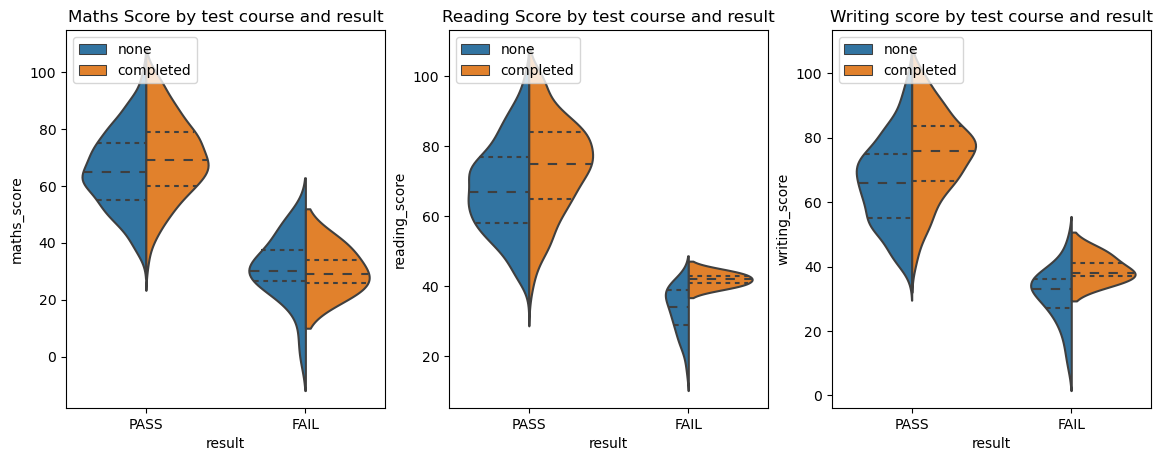

In [37]:
plt.figure(figsize=(14,5), dpi=100)
color=sns.color_palette()[0]
    
# plot for maths score
plt.subplot(1, 3, 1);
count=df_clean.groupby(['test_preparation_course','result'],as_index=False)['maths_score'].mean().sort_values(by='maths_score')
print("Maths Score by test course and result")
print(count)
print()
sns.violinplot(x='result',y='maths_score',hue='test_preparation_course',data=df_clean,inner='quartile',split=True)
plt.title("Maths Score by test course and result");
plt.legend(loc=2)


# plot for reading score
plt.subplot(1, 3, 2);
count=df_clean.groupby(['test_preparation_course','result'],as_index=False)['reading_score'].mean().sort_values(by='reading_score')
print("Reading Score Average by test course and result")
print(count)
print()
sns.violinplot(x='result', y='reading_score',hue='test_preparation_course',data=df_clean,inner="quartile",split=True)
plt.title("Reading Score by test course and result");
plt.legend(loc=2)

#plot for writing score
plt.subplot(1, 3, 3);
count=df_clean.groupby(['test_preparation_course','result'],as_index=False)['writing_score'].mean().sort_values(by='writing_score')
print("Writing Score by test course and result")
print(count)
print()
sns.violinplot(x='result', y='writing_score',hue='test_preparation_course',data=df_clean,inner="quartile",split=True)
plt.title("Writing score by test course and result");
plt.legend(loc=2)
    
plt.show();


Total Score and percentage by result and parental education

Results by total score and parent education
      parent_education result  Total_score
9     some high school   FAIL    93.100000
7         some college   FAIL    93.500000
4          high school   FAIL    96.700000
0   associate's degree   FAIL   107.000000
2    bachelor's degree   FAIL   118.000000
5          high school   PASS   194.268817
10    some high school   PASS   201.372781
8         some college   PASS   208.481818
1   associate's degree   PASS   209.631818
3    bachelor's degree   PASS   217.456897
6      master's degree   PASS   220.796610


Results by Percentage and parent education
      parent_education result  percentage
9     some high school   FAIL   31.033333
7         some college   FAIL   31.166667
4          high school   FAIL   32.233333
0   associate's degree   FAIL   35.666667
2    bachelor's degree   FAIL   39.333333
5          high school   PASS   64.756272
10    some high school   PASS   67.124260
8         some college   PASS   69.493939
1   associate's d

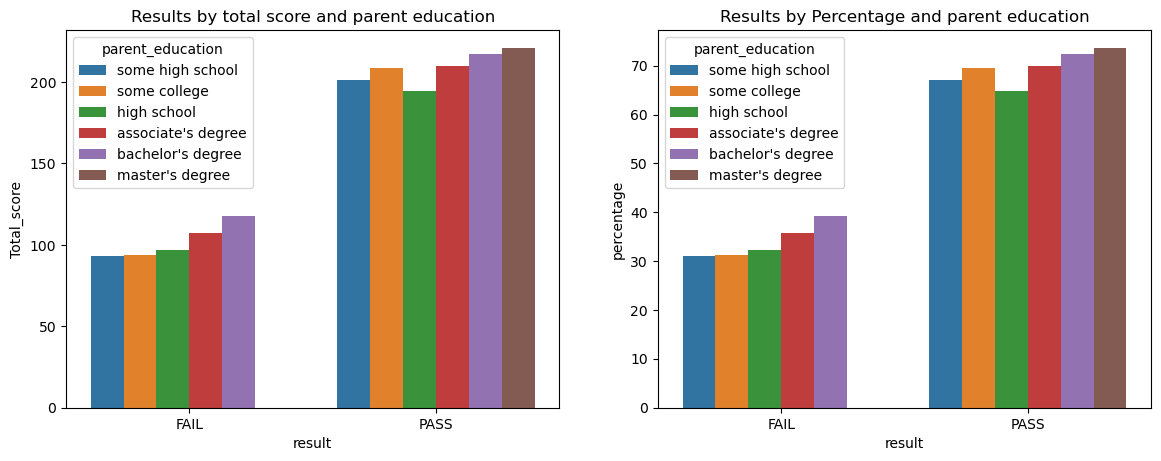

In [38]:
plt.figure(figsize=(14,5), dpi=100)
plt.subplot(1,2,1)
count=df_clean.groupby(['parent_education','result'],as_index=False)['Total_score'].mean().sort_values(by='Total_score');
print("Results by total score and parent education")
print(count)
print()
sns.barplot(x='result',y='Total_score',hue='parent_education',data=count);
plt.title("Results by total score and parent education");

plt.subplot(1,2,2)
count=df_clean.groupby(['parent_education','result'],as_index=False)['percentage'].mean().sort_values(by='percentage');
print()
print("Results by Percentage and parent education")
print(count)
sns.barplot(x='result',y='percentage',hue='parent_education',data=count);
plt.title("Results by Percentage and parent education");
